In [51]:
import numpy as np
import pandas as pd
from scipy.special import erf
from scipy.stats import norm
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import lognorm
from scipy.stats import ncx2
from pytictoc import TicToc

In [52]:
#Monte Carlo simulation of Feller Square-root process
#dX=alpha*(mu-X)*dt+sigma*np.sqrt(X)*dW
#Used in the Cox-Ingersoll-Ross model and in the Heston stochastic volatility model

#Define parameters and time grid
npaths=np.power(10,3)*2 #number of paths
T=1 #time horizon
nsteps=200 #number of time steps
dt=T/nsteps #time step
t=np.arange(0,T,dt) #observation times 
alpha,mu,sigma=5,0.07,0.265 #model parameters
#alpha,mu,sigma=5,0.03,0.8 #model parameters
XO=0.03 #initial value
Feller_ratio=2*alpha*mu/sigma**2 #for monitoring

#Monte Carlo 

#Allocate and initialise all paths
X=[np.zeros(nsteps)]*npaths
X=np.insert(X,0,XO,axis=1)
X=np.delete(X,-1,axis=1)

timing=TicToc()
timing.tic()
#Euler-Maruyama
N=np.random.randn(npaths,nsteps) #sample standard normal random numbers
a = sigma**2/alpha*(np.exp(-alpha*dt)-np.exp(-2*alpha*dt)) #with analytic moments
b = mu*sigma**2/(2*alpha)*(1-np.exp(-alpha*dt))**2 #with analytic moments

for i in range(nsteps-1):
    for j in range(npaths):
        #X[j][i+1]=X[j][i] + alpha*(mu-X[j][i])*dt + sigma*np.sqrt(X[j][i]*dt)*N[j][i] #plain
        X[j][i+1]=mu+(X[j][i]-mu)*np.exp(-alpha*dt) + np.sqrt(a*X[j][i]+b)*N[j][i] #with analytic moments
        if X[j][i+1]<0:
            X[j][i+1]=0
timing.toc()

Elapsed time is 2.619315 seconds.


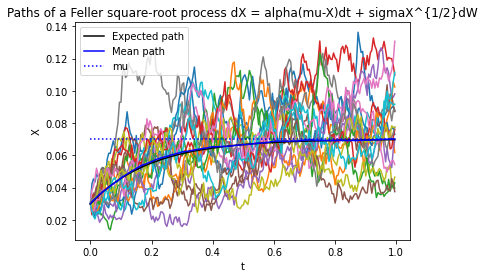

In [53]:
#Expected mean and sample paths
plt.figure(1)
EX = mu + (XO-mu)*np.exp(-alpha*t)
df=pd.concat([pd.Series(x) for x in X], axis=1)
mean_df=df.apply(lambda row: np.mean(row),axis=1)
for k in range(int(nsteps/10)):
    plt.plot(t,X[k])
plt.plot(t,EX,'k',label='Expected path')
plt.plot(t,mean_df,color='b',label='Mean path')
plt.plot(t,np.ones(nsteps)*mu,':b',label='mu')
sdevinfty = sigma*np.sqrt(mu/(2*alpha))
plt.legend()
plt.xlabel('t')
plt.ylabel('X')
plt.title('Paths of a Feller square-root process dX = alpha(mu-X)dt + sigmaX^{1/2}dW')
plt.show()

In [54]:
#Probability density function at different times
t2 = [0.05,0.1,0.2,0.4,0.99]
x2 = np.linspace(-0.02,mu+4*sdevinfty,200)
k2=np.zeros(len(t2))
for l in range(len(t2)):
    k2[l]=sigma**2*(1-np.exp(-alpha*t2[l]))/(4*alpha)
d = 4*alpha*mu/sigma**2
lambdaz=np.zeros(len(t2))
for o in range(len(t2)):
    lambdaz[o] = 4*alpha*XO/(sigma**2*(np.exp(alpha*t2[o])-1))
fa=[np.zeros(len(x2))]*len(t2) #analytical

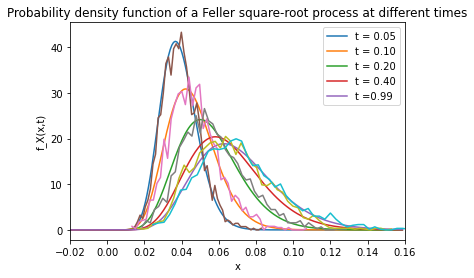

In [55]:
for p in range(len(t2)):
    fa[p]=ncx2.pdf(x2/k2[p],d,lambdaz[p])/k2[p]
for y in range(len(fa)):
    plt.plot(x2,fa[y])
for z in range(len(t2)):
    hist,x_values=np.histogram(X[:,int(t2[z]*nsteps)],bins=50,density=True)
    plt.plot(x_values[1:],hist) #sampled
plt.title('Probability density function of a Feller square-root process at different times')
plt.xlabel('x')
plt.ylabel('f_X(x,t)')
plt.xlim([-0.02,0.16])
plt.legend(['t = 0.05','t = 0.10','t = 0.20','t = 0.40','t =0.99'])
plt.show()